# Netflix Movies and TV Shows Data Analysis

### Importing Libraries and Loading Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer


In [4]:
# Load the data
data = pd.read_csv('data/netflix_titles.csv')
data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
data['listed_in'].value_counts()

listed_in
Dramas, International Movies                        336
Stand-Up Comedy                                     286
Comedies, Dramas, International Movies              257
Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                  179
                                                   ... 
Anime Series, Crime TV Shows, TV Horror               1
Romantic TV Shows, TV Comedies, TV Dramas             1
Anime Series, Romantic TV Shows, Teen TV Shows        1
TV Dramas                                             1
Documentaries, Dramas                                 1
Name: count, Length: 335, dtype: int64

In [10]:
# listed_in column is a comma separated string, split the string and get all the genres
# Split the 'listed_in' column on commas to create a list of genres
data['listed_in'] = data['listed_in'].apply(lambda x: x.split(', '))

# Explode the list into separate rows
data_exploded = data.explode('listed_in')

In [11]:
data_exploded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,International Movies,"On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,Reality TV,A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [12]:
data['country'].value_counts()

country
United States                                    1846
India                                             875
United Kingdom                                    183
Canada                                            107
Spain                                              91
                                                 ... 
United States, Sweden, Norway                       1
United States, Germany, United Kingdom, Italy       1
United States, New Zealand, United Kingdom          1
Finland, United States                              1
Spain, France, Uruguay                              1
Name: count, Length: 604, dtype: int64

In [13]:
# confusion Matrix for title and the listed_in
confusion_matrix = data.groupby(['title', 'listed_in']).size().unstack(fill_value=0)


TypeError: unhashable type: 'list'

## Text Processing on Description

- Action
- Comedy
- Drama
- Fantasy
- Horror
- Mystery
- Romance
- Thriller
- Western

In [197]:
import nltk
from nltk.tokenize import word_tokenize

# Ensure stopwords are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Tokenization function
def tokenize_text(text):
    return word_tokenize(text)

# Assuming `data` is a pandas DataFrame
mined_data = {'title': [], 'Tokens': [], 'listed_in': [], 'country': [], 'type': [], 'rating': []}

# Iterating over the DataFrame
for index, row in data_exploded.iterrows():
    # Tokenize the description
    words = tokenize_text(row['description'])
    
    # lowercase 
    words = [word.lower() for word in words]
    
    # Stopword removal
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # remove punctuation
    import re
    words = [re.sub(r'\W+', '', word) for word in words if word.isalpha()]
    
    # lemmentize
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # one, two, three, four, five, six, seven, eight, nine, ten removed
    words = [word for word in words if word not in ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']]
    
    # modal verbs removed
    words = [word for word in words if word not in ['can', 'could', 'may', 'might', 'must', 'will', 'would', 'shall', 'should', 'take', 'find','help', 'get']]
    
    # Update the 'data' dataframe with the tokenized description
    mined_data['title'].append(row['title'])
    mined_data['Tokens'].append(words)
    mined_data['listed_in'].append(row['listed_in'])
    mined_data['country'].append(row['country'])
    mined_data['type'].append(row['type'])
    mined_data['rating'].append(row['rating'])
    

# Create a new DataFrame with the tokenized description
df = pd.DataFrame(mined_data)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahshid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mahshid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mahshid/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,Tokens,listed_in,country,type,rating
0,Sankofa,"[photo, shoot, ghana, american, model, slip, b...",Dramas,"United States, Ghana, Burkina Faso, United Kin...",Movie,TV-MA
1,Sankofa,"[photo, shoot, ghana, american, model, slip, b...",Independent Movies,"United States, Ghana, Burkina Faso, United Kin...",Movie,TV-MA
2,Sankofa,"[photo, shoot, ghana, american, model, slip, b...",International Movies,"United States, Ghana, Burkina Faso, United Kin...",Movie,TV-MA
3,The Great British Baking Show,"[talented, batch, amateur, baker, face, compet...",British TV Shows,United Kingdom,TV Show,TV-14
4,The Great British Baking Show,"[talented, batch, amateur, baker, face, compet...",Reality TV,United Kingdom,TV Show,TV-14


In [198]:
df['listed_in'].value_counts()

listed_in
International Movies            2369
Dramas                          2293
Comedies                        1553
Action & Adventure               806
Independent Movies               740
Romantic Movies                  579
Thrillers                        547
Children & Family Movies         503
Documentaries                    391
Horror Movies                    336
Stand-Up Comedy                  294
Music & Musicals                 292
Sci-Fi & Fantasy                 236
Sports Movies                    156
Classic Movies                   108
International TV Shows            87
LGBTQ Movies                      80
Cult Movies                       69
Anime Features                    61
Faith & Spirituality              58
TV Dramas                         52
Crime TV Shows                    38
TV Comedies                       30
British TV Shows                  21
Romantic TV Shows                 21
Movies                            20
Docuseries                  

In [199]:
# Drop 'International Movies' and 'International TV Shows' as they are not specific genre
df = df[df['listed_in'] != 'International Movies']
df = df[df['listed_in'] != 'International TV Shows']
df  = df[df['listed_in'] != 'Independent Movies']


In [200]:
df['listed_in'].value_counts()

listed_in
Dramas                          2293
Comedies                        1553
Action & Adventure               806
Romantic Movies                  579
Thrillers                        547
Children & Family Movies         503
Documentaries                    391
Horror Movies                    336
Stand-Up Comedy                  294
Music & Musicals                 292
Sci-Fi & Fantasy                 236
Sports Movies                    156
Classic Movies                   108
LGBTQ Movies                      80
Cult Movies                       69
Anime Features                    61
Faith & Spirituality              58
TV Dramas                         52
Crime TV Shows                    38
TV Comedies                       30
British TV Shows                  21
Romantic TV Shows                 21
Movies                            20
Docuseries                        14
TV Action & Adventure             13
Kids' TV                          13
Stand-Up Comedy & Talk Shows

In [201]:
# add 'TV Dramas' to 'Dramas'
df['listed_in'] = df['listed_in'].replace({'TV Dramas': 'Dramas',
                                           'Action & Adventure': 'Action',
                                           'Romantic Movies': 'Romantics',
                                           'Children & Family Movies': 'Family',
                                           'Classic Movies': 'Classic',
                                           'Horror Movies': 'Horror',
                                           'Music & Musicals': 'Musical',
                                           'Sci-Fi & Fantasy': 'Fantasy',
                                           'Sports Movies': 'Sports',
                                           'LGBTQ Movies': 'LGBTQ',
                                           'Cult Movies': 'Classic',
                                           'Faith & Spirituality': 'Faith',
                                           'Anime Features': 'Anime',
                                           'TV Comedies': 'Comedies',
                                           'TV Mysteries': 'Mystery',
                                           'TV Sci-Fi & Fantasy': 'Fantasy',
                                           'TV Thrillers': 'Thrillers',
                                           'TV Horror': 'Horror',
                                           'TV Action & Adventure': 'Action',
                                           'Reality TV': 'Reality',
                                           'Teen TV Shows': 'Teen',
                                           'Classic & Cult TV': 'Classic',
                                           'Science & Nature TV': 'Science',
                                           'Crime TV Shows': 'Crime',
                                           'Romantic TV Shows': 'Romantics',
                                           'British TV Shows': 'British',
                                           'Korean TV Shows': 'Korean',
                                           'Spanish-Language TV Shows': 'Spanish',
                                           "Kids' TV": 'Family',
                                           'Stand-Up Comedy & Talk Shows': 'Stand-Up Comedy',
                                           'Anime Series': 'Anime',
                                           'Science': 'Docuseries',
                                           })


In [202]:
df['listed_in'].value_counts()

listed_in
Dramas             2345
Comedies           1583
Action              819
Romantics           600
Thrillers           550
Family              516
Documentaries       391
Horror              343
Stand-Up Comedy     305
Musical             292
Fantasy             240
Classic             180
Sports              156
LGBTQ                80
Anime                71
Faith                58
Crime                38
British              21
Movies               20
Docuseries           14
Spanish              10
Korean               10
Mystery               8
TV Shows              5
Reality               3
Teen                  3
Science               1
Name: count, dtype: int64

In [203]:
df.head()

,title,Tokens,listed_in,country,type,rating
0,Sankofa,"[photo, shoot, ghana, american, model, slip, b...",Dramas,"United States, Ghana, Burkina Faso, United Kin...",Movie,TV-MA
3,The Great British Baking Show,"[talented, batch, amateur, baker, face, compet...",British,United Kingdom,TV Show,TV-14
4,The Great British Baking Show,"[talented, batch, amateur, baker, face, compet...",Reality,United Kingdom,TV Show,TV-14
5,The Starling,"[woman, adjusting, life, loss, contends, feist...",Comedies,United States,Movie,PG-13
6,The Starling,"[woman, adjusting, life, loss, contends, feist...",Dramas,United States,Movie,PG-13


In [ ]:
# Save the preprocessed data without any null columns to a csv file
df.to_csv('data/netflix_titles_preprocessed.csv', index=True)

### Word Frequency

In [173]:
# frequency of words in each genre

def word_genre_freq(dataframe):
    
    genre_word_frequency = {}

    for index, row in dataframe.iterrows():
        genre = row['listed_in']
        tokens = row['Tokens']

        if genre not in genre_word_frequency:
            genre_word_frequency[genre] = Counter()

        genre_word_frequency[genre].update(tokens)
    
    
    return genre_word_frequency

In [174]:
genre_word_freq = word_genre_freq(df)

In [175]:
genre_word_freq['Dramas']

Counter({'young': 339,
         'life': 327,
         'woman': 239,
         'man': 229,
         'family': 224,
         'love': 217,
         'new': 183,
         'father': 150,
         'friend': 144,
         'fall': 114,
         'son': 112,
         'teen': 105,
         'story': 100,
         'girl': 99,
         'mother': 98,
         'home': 97,
         'year': 95,
         'school': 94,
         'world': 93,
         'student': 89,
         'daughter': 87,
         'wife': 85,
         'becomes': 81,
         'boy': 81,
         'brother': 80,
         'true': 76,
         'return': 75,
         'go': 75,
         'couple': 74,
         'secret': 73,
         'war': 72,
         'murder': 72,
         'drama': 71,
         'try': 71,
         'begin': 71,
         'crime': 69,
         'based': 68,
         'face': 68,
         'past': 67,
         'meet': 67,
         'struggle': 66,
         'death': 66,
         'make': 66,
         'child': 65,
         'soon': 62,
     

In [176]:
genre_word_freq['Action']

Counter({'young': 71,
         'man': 63,
         'life': 60,
         'agent': 55,
         'team': 53,
         'mission': 48,
         'cop': 48,
         'group': 45,
         'new': 44,
         'world': 43,
         'force': 42,
         'friend': 41,
         'war': 41,
         'family': 38,
         'terrorist': 36,
         'fight': 36,
         'gang': 35,
         'try': 34,
         'criminal': 34,
         'save': 34,
         'father': 33,
         'crime': 33,
         'brother': 33,
         'revenge': 32,
         'officer': 32,
         'drug': 31,
         'go': 31,
         'woman': 31,
         'power': 30,
         'rescue': 30,
         'love': 30,
         'daughter': 30,
         'battle': 28,
         'city': 28,
         'murder': 27,
         'police': 26,
         'attack': 26,
         'son': 26,
         'soldier': 26,
         'secret': 25,
         'master': 24,
         'year': 24,
         'protect': 24,
         'back': 24,
         'way': 24,
    

### Word Cloud Visualization

In [177]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# with the top 20 words in each genre

def plot_word_cloud(genre_word_freq, genres=None):  
    for genre, freq in genre_word_freq.items():
        if genre == genres:
            freq = dict(freq.most_common(20))
            wordcloud = WordCloud(width = 800, height = 800, 
                            background_color ='white', 
                            stopwords = set(stopwords.words('english'), ),
                            min_font_size = 10).generate_from_frequencies(freq)
    
            plt.figure(figsize = (8, 8), facecolor = None) 
            plt.imshow(wordcloud) 
            plt.axis("off") 
            plt.tight_layout(pad = 0) 
            plt.title(genre)
            plt.show()

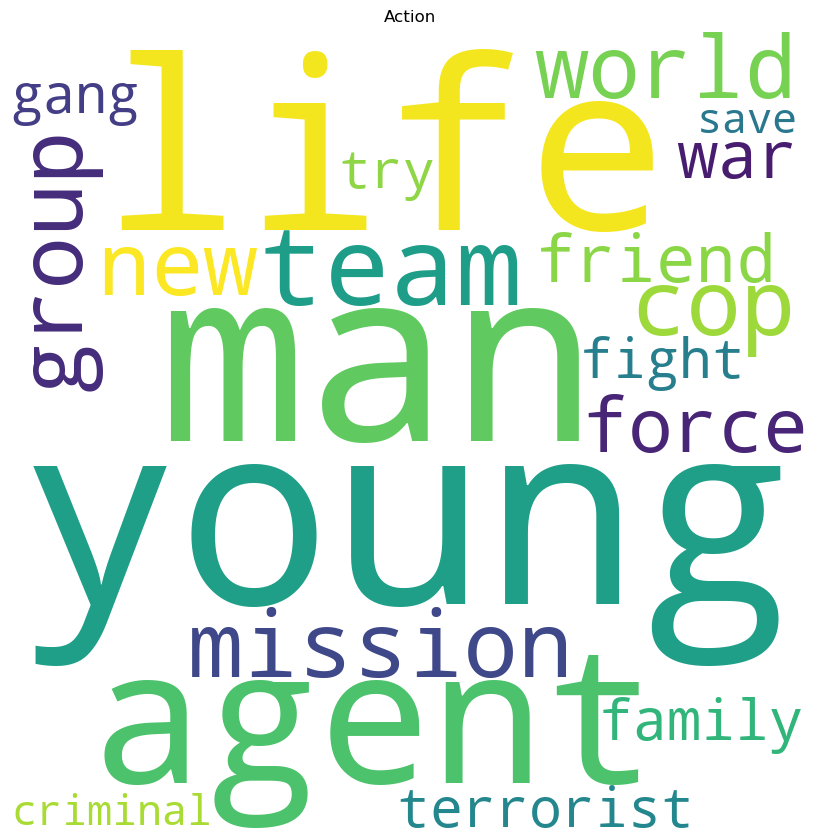

In [178]:
plot_word_cloud(genre_word_freq, genres='Action')

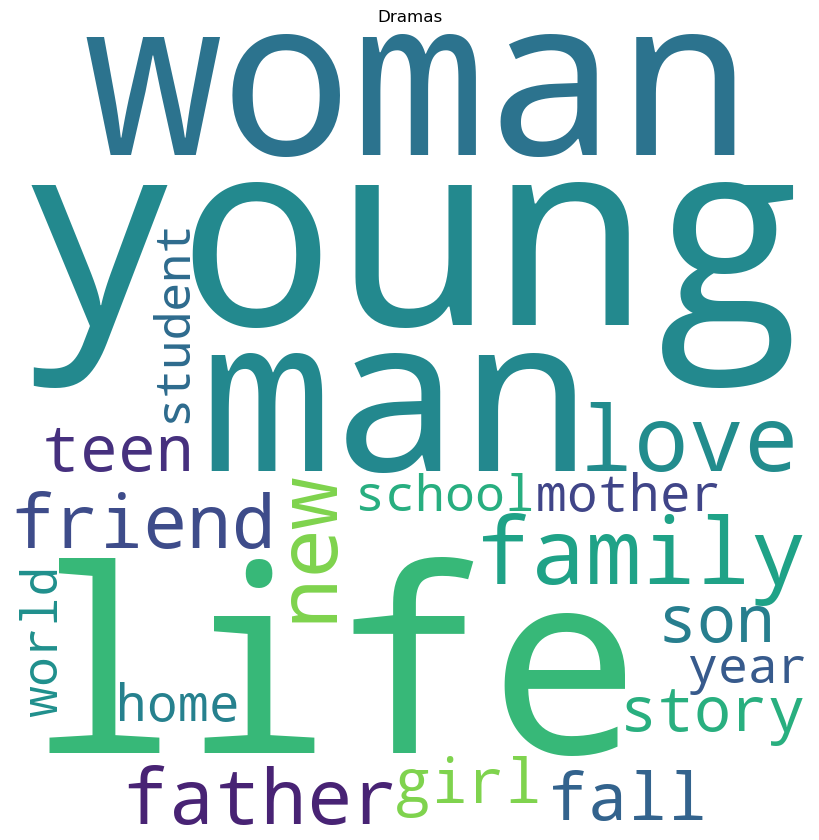

In [179]:
plot_word_cloud(genre_word_freq, genres='Dramas')

In [184]:
! pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 5.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 946.0 kB/s eta 0:00:00


In [185]:
from pyvis.network import Network

net = Network(notebook = True, cdn_resources = "remote",
                bgcolor = "#222222",
                font_color = "white",
                height = "750px",
                width = "100%",
)



In [187]:
nodes = list(set([*df.listed_in,*df.country]))

AttributeError: 'DataFrame' object has no attribute 'country'

### Language Modeling and genre prediction

In [180]:
#### Just to check the push git 